# Multiple Linear Regression 

### Predicting fuel efficiency based on horsepower and weight input values 

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model


# Read cars dataset
cars = pd.read_csv('../../data/autos.csv', header=None, sep='\s+')

# Extract mpg values
y = cars.iloc[:, 0].values

# Extract horsepower and weight values
X = cars.iloc[:, [3, 4]].values

# Fit linear regression model
reg = linear_model.LinearRegression()
reg.fit(X, y)

# Coefficients
intercept = reg.intercept_
coefficients = reg.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)


# Compute correlation coefficient
correlation_matrix = np.corrcoef(reg.predict(X), y)
correlation_coefficient = correlation_matrix[0, 1]  
print("Correlation Coefficient:", correlation_coefficient)

# Compute mean squared error (MSE)
mse = sum((reg.predict(X) - y) ** 2) / len(y)
print("Mean Squared Error (MSE):", mse)


Intercept: 45.64021084017713
Coefficients: [-0.04730286 -0.00579416]
Correlation Coefficient: 0.8404613457678084
Mean Squared Error (MSE): 17.841442442550594


### Plotting the Hyperplane

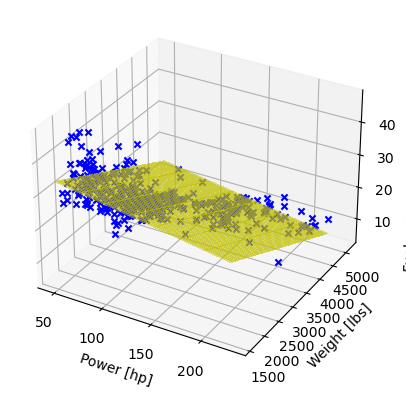

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot data points
for i in range(0,len(y)):
    ax.scatter(X[i,0], X[i,1], y[i], color='blue', marker='x')

# Plot hyperplane
X0 = np.arange(min(X[:, 0]), max(X[:, 0]), 25)
X1 = np.arange(min(X[:, 1]), max(X[:, 1]), 25)
X0, X1 = np.meshgrid(X0, X1)
Z = np.zeros_like(X0)

for i in range(X0.shape[0]):
    for j in range(X0.shape[1]):
        Z[i, j] = reg.predict([[X0[i, j], X1[i, j]]])

ax.plot_surface(X0, X1, Z, color='yellow', linewidth=0, antialiased=False, alpha=0.5)

ax.set_xlabel('Power [hp]')
ax.set_ylabel('Weight [lbs]')
ax.set_zlabel('Fuel consumption [miles/gallon]')

plt.show()